Возьмем набор данных с сайта kaggle о мультфильмах Диснея. Построим несколько визуализаций

In [ ]:
import pandas as pd
df=pd.read_csv('disney_plus_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


Количество выпусков мультфилмов по годам. По графику можно сделать вывод , что количество очень стремительно стало расти в начале 90-х годов и очень резкий рост наблюдался после 2018 года

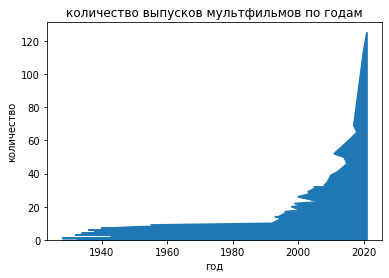

In [ ]:
df['release_year'].value_counts().plot(kind='area', title='количество выпусков мультфильмов по годам', xlabel='год', ylabel='количество')

посмотрим распределение рейтинга. Самые популярные рейтинги tv-g и tv-pg

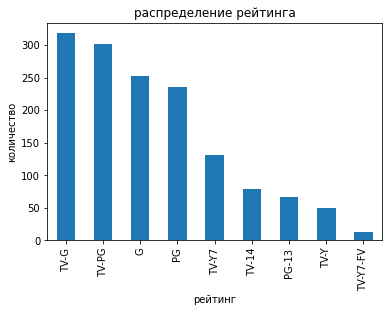

In [ ]:
df['rating'].value_counts().plot(kind='bar', title='распределение рейтинга', xlabel='рейтинг', ylabel='количество')

Топ-10 самых популярных жанров среди мультфильмов Диснея. Самый популярный жанр Animation,Comedy,Family и это неудивительно)

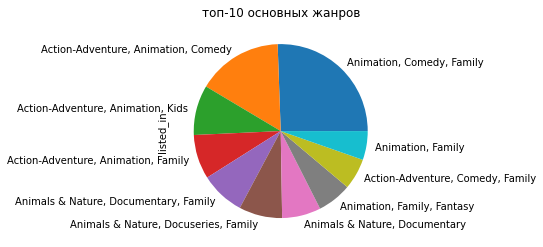

In [ ]:
df['listed_in'].value_counts().head(10).plot(kind='pie', title='топ-10 основных жанров')

In [ ]:
топ 10 директоров

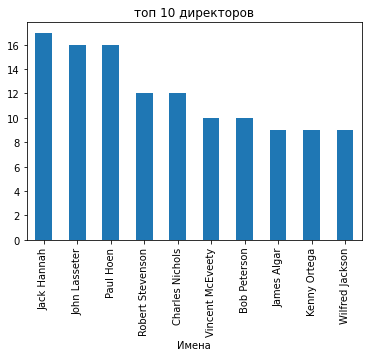

In [ ]:
df['director'].value_counts().head(10).plot(kind='bar', title='топ 10 директоров', xlabel='Имена')


Но хочется проанализировать датасет в котором есть цифры) Для этого возьмем набор данных Продажи супермаркета 

In [1]:
import pandas as pd
mar=pd.read_csv('supermarket_sales - Sheet1.csv')
mar.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Посмотрим рейтинг на ящике с усами (сводка мин мах медианы и т.д.) Самые частые рейтинги это те что входят в межквартильный размах. Это от 5.5 до 8.5

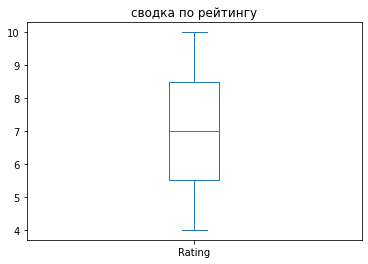

In [ ]:
mar['Rating'].plot(kind='box', title='сводка по рейтингу')

Хочется поискать зависимости. Посмотрим коррелируется ли общая сумма с рейтингом клиента? Возможно чем больше рейтинг клиента тем на большую сумму от покупает. Судя по визуализации есть очень маленькая зависимость

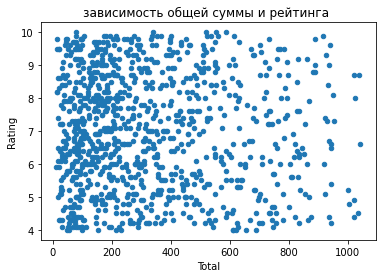

In [ ]:
mar.plot(kind='scatter', x='Total', y='Rating', title= 'зависимость общей суммы и рейтинга ')

Построим сводную таблицу чтобы посмотрим какие категории товаров выбирают чаще женщины и какие товары мужчины. Чтобы было наглядней смотрим heatmap. Женщины больше покупают в разделе Продукты и Напитки , а мужчины Здоровье и Красота. Неожиданно) Видимо женщины покупают продукты а мужчины подарки своим женщинам)

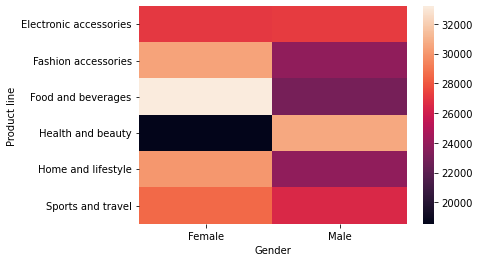

In [2]:
import seaborn as sns
mar2=mar.pivot_table(index='Product line', columns='Gender', values='Total', aggfunc=sum)
sns.heatmap(mar2)

Посмотрим в каком городе покупают больше. Оказалось примерно одинаково

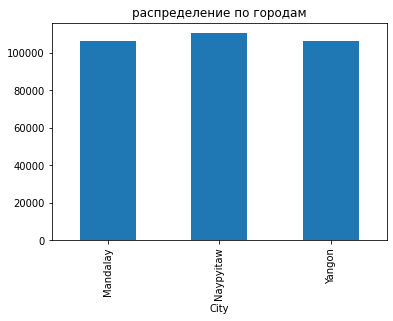

In [ ]:
mar3=mar.groupby('City')['Total'].sum()
mar3.plot(kind='bar', title='распределение по городам')